# STAT 201 Group 43 - Group Project Proposal

## Title: Determining whether a mutant strain of the nematode C. elegans slows its rate of locomotion when in the presence of nutrients

In [1]:
# Please run this cell before continuing, installing packages if necessary.
library(tidyverse)
library(RColorBrewer)
library(tidymodels)
set.seed(2023)
options(repr.plot.width = 14, repr.plot.height = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

## Introduction

[placeholder]

## Preliminary results

[placeholder]

In [2]:
worm_data_raw <- read_csv('N2_CB1112_baseline_output_12_11_2022.csv', show_col_types = FALSE)

head(worm_data_raw)
nrow(worm_data_raw)

time_bin,worm,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Strain
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5,27,4.707,0.2312,23.73,29.97,10.880,0.07470,57.80,1,42.10,0,0.02003,0.7560,0.9690,0.2386,0.0867,0.0871,N2_Food
5,156,4.484,0.2195,36.94,25.75,7.300,0.13040,34.50,1,31.17,0,0.02087,0.9320,1.0360,0.1998,0.1648,0.1556,N2_Food
5,185,4.715,0.2563,25.62,24.98,34.660,0.08360,38.50,1,30.64,0,0.02118,0.7200,0.9310,0.2660,0.1404,0.1324,N2_Food
5,192,4.600,0.1354,28.47,19.23,5.484,0.06230,28.60,1,26.06,0,0.00981,0.5806,0.8200,0.1979,0.1378,0.1079,N2_Food
5,198,4.715,0.1797,24.28,30.77,3.680,0.05940,48.56,1,35.38,0,0.01484,0.7950,0.9263,0.1696,0.1467,0.1315,N2_Food
5,208,4.824,0.2135,27.83,25.23,5.035,0.05133,51.94,1,34.78,0,0.00853,0.8657,0.9717,0.2160,0.1774,0.1526,N2_Food


[1] 252756

In [23]:
#Select worm, speed, Strain column
#Filter observations with Strain "CB1112_Food" and "CB1112_NoFood"
worm_data_cleaned <- worm_data_raw |>
select(worm, speed, Strain) |>
filter(Strain %in% c("CB1112_Food", "CB1112_NoFood")) |>
group_by(Strain, worm) |>
summarize(speed = mean(speed))
head(worm_data_cleaned)
nrow(worm_data_cleaned)

`summarise()` has grouped output by 'Strain'. You can override using the
`.groups` argument.


Strain,worm,speed
<chr>,<dbl>,<dbl>
CB1112_Food,1,0.2243345
CB1112_Food,2,0.1039276
CB1112_Food,3,0.1803790
CB1112_Food,4,0.2429433
CB1112_Food,6,0.2389154
CB1112_Food,7,0.1302114


[1] 932

In [26]:
#Change "CB1112_Food" to "Food", "CB1112_NoFood" to "NoFood", rename the column "Strain" as "food_status"
 colnames(worm_data_cleaned)[1]  <- "food_status" 
 worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_Food"] <- "Food"
 worm_data_cleaned$food_status[worm_data_cleaned$food_status=="CB1112_NoFood"] <- "NoFood"

head(worm_data_cleaned)
nrow(worm_data_cleaned)

food_status,worm,speed
<chr>,<dbl>,<dbl>
Food,1,0.2243345
Food,2,0.1039276
Food,3,0.1803790
Food,4,0.2429433
Food,6,0.2389154
Food,7,0.1302114


[1] 932

In [27]:
# mean, standard deviation, number of observations
summary <- worm_data_cleaned |>
group_by(food_status) |>
summarize(mean = mean(speed), 
          sd = sd(speed),
          n=n())
summary

food_status,mean,sd,n
<chr>,<dbl>,<dbl>,<int>
Food,0.1799004,0.04499372,521
NoFood,0.2018251,0.04383005,411


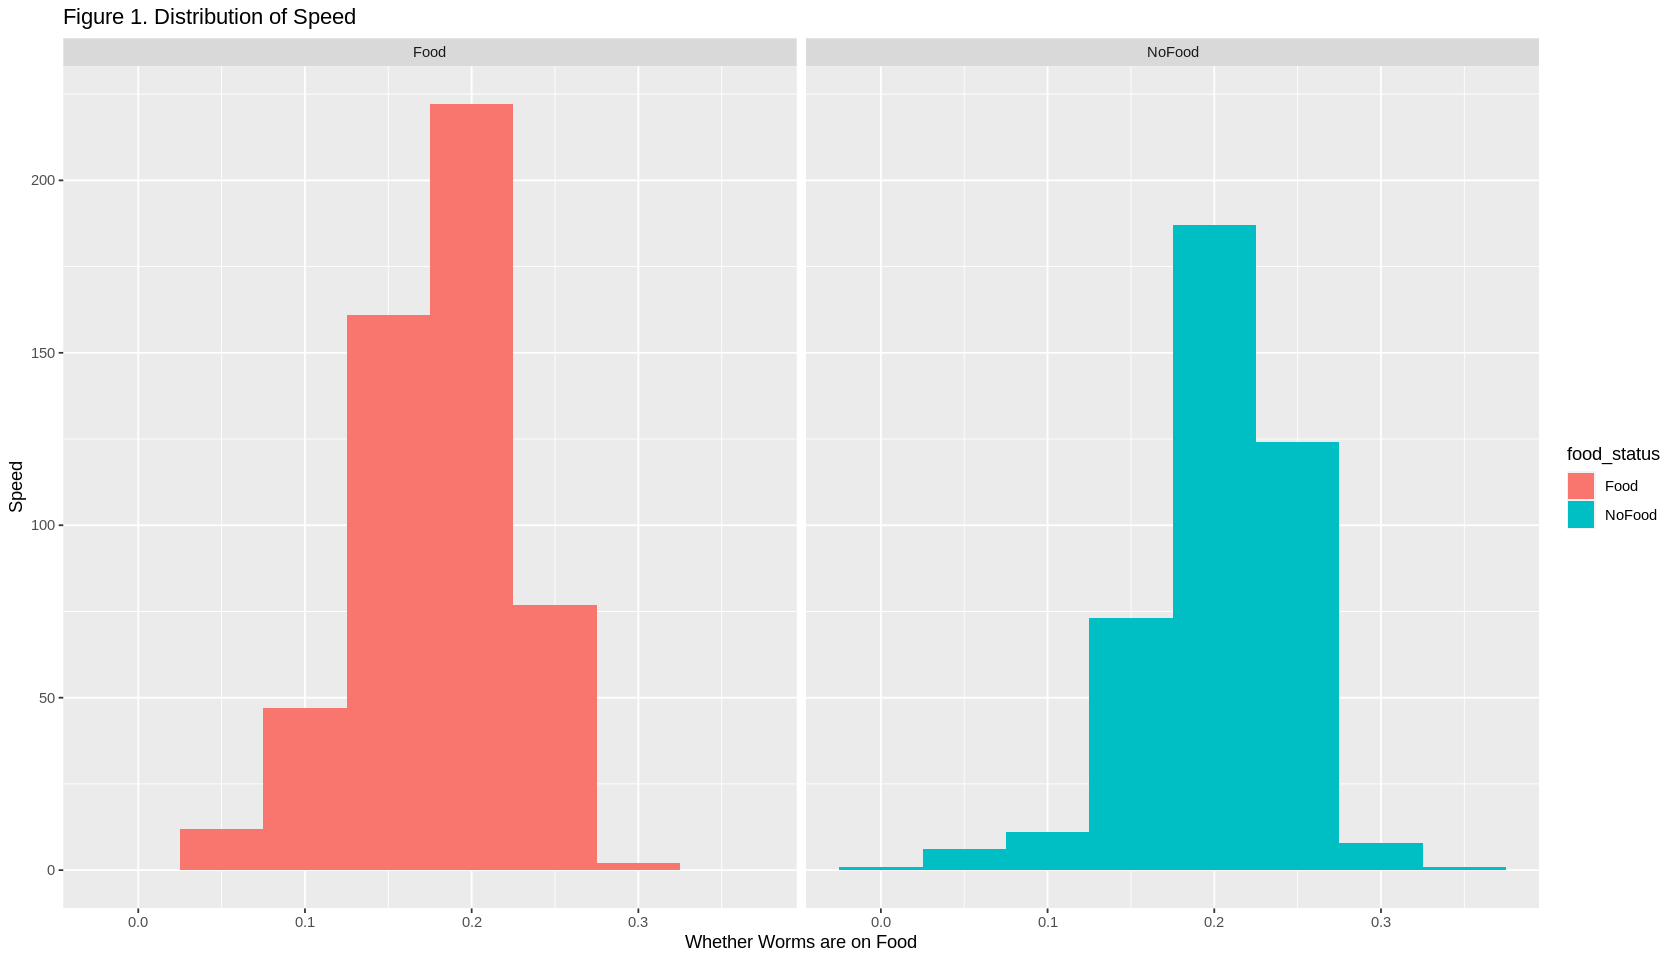

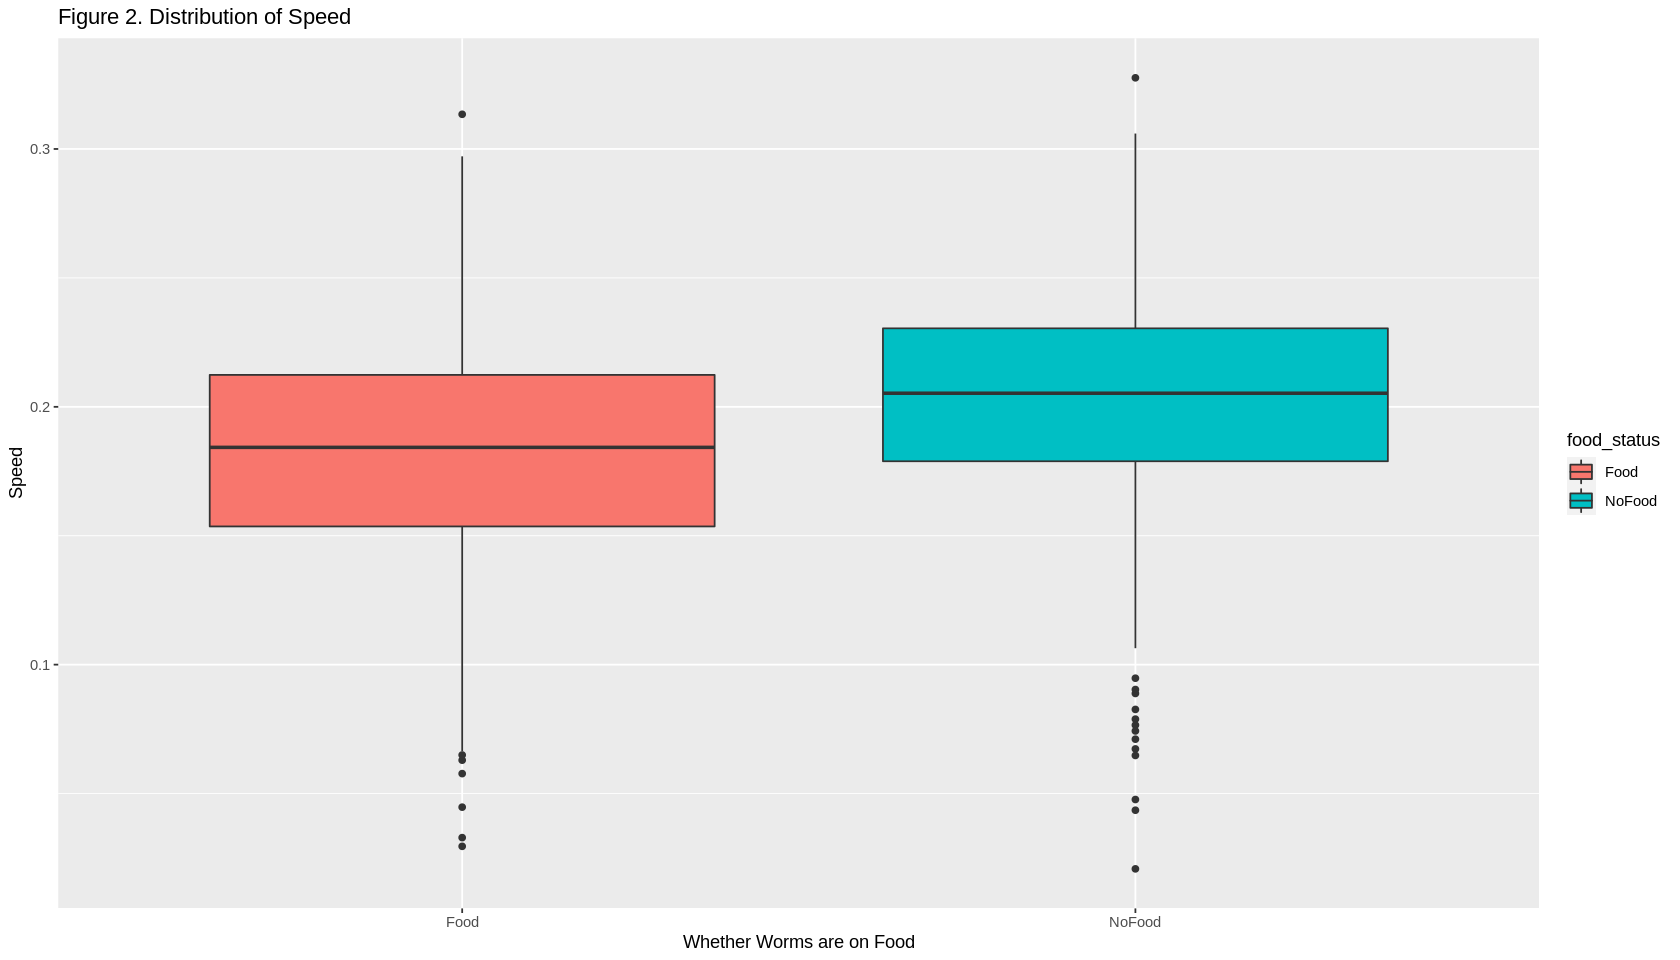

In [28]:
#Plots
hist <- worm_data_cleaned |>
ggplot(aes(x=speed, fill=food_status)) +
geom_histogram(binwidth=0.05) +
facet_grid(~food_status) +
labs(x="Whether Worms are on Food",
     y="Speed",
     title = "Figure 1. Distribution of Speed")

hist

boxplot <- worm_data_cleaned |>
ggplot() +
geom_boxplot(aes(food_status, speed, fill = food_status)) +
labs(x="Whether Worms are on Food",
     y="Speed",
     title = "Figure 2. Distribution of Speed")

boxplot

## Methods: Plan

[placeholder]

## References

[placeholder]